In [37]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [38]:
# Load the MadinatyHouse dataset
MadinatyHouse = pd.read_csv(r'/content/Madinaty_House_Pricing_Datalist.csv')
MadinatyHouse.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,sqft_lot,statezip,city
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,33,171,19519,Madinaty
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,G 33 B 16 A1,320,19519,Madinaty
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,G 33 B 17 A1,110,19519,Madinaty
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,G 33 B 18 A1,171,19519,Madinaty
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,G 33 B 19 A1,171,19519,Madinaty


In [39]:
MadinatyHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              49 non-null     float64
 1   Avg. Area House Age           49 non-null     float64
 2   Avg. Area Number of Rooms     49 non-null     float64
 3   Avg. Area Number of Bedrooms  49 non-null     float64
 4   Area Population               49 non-null     float64
 5   Price                         49 non-null     float64
 6   Address                       49 non-null     object 
 7   sqft_lot                      49 non-null     int64  
 8   statezip                      49 non-null     int64  
 9   city                          49 non-null     object 
dtypes: float64(6), int64(2), object(2)
memory usage: 4.0+ KB


In [40]:
MadinatyHouse.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,sqft_lot,statezip
count,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01,49.000000,49.0
mean,66480.372396,5.956592,7.029142,3.977143,34246.570063,1.145811e+06,198.489796,19519.0
std,13182.605650,1.014779,1.075885,1.304029,8696.030037,3.707762e+05,89.144574,0.0
min,17796.631190,4.018525,4.242191,2.030000,16810.783310,3.023558e+05,110.000000,19519.0
25%,59927.660810,5.339340,6.517175,3.090000,27637.656550,9.363690e+05,110.000000,19519.0
50%,64698.463430,5.739411,7.150537,4.070000,34343.991890,1.109588e+06,171.000000,19519.0
75%,77811.522030,6.627457,7.748682,4.440000,39717.813580,1.402818e+06,320.000000,19519.0
max,90499.057450,8.287562,9.289854,6.350000,60828.249090,2.146925e+06,320.000000,19519.0


In [41]:
MadinatyHouse.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'sqft_lot', 'statezip', 'city'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


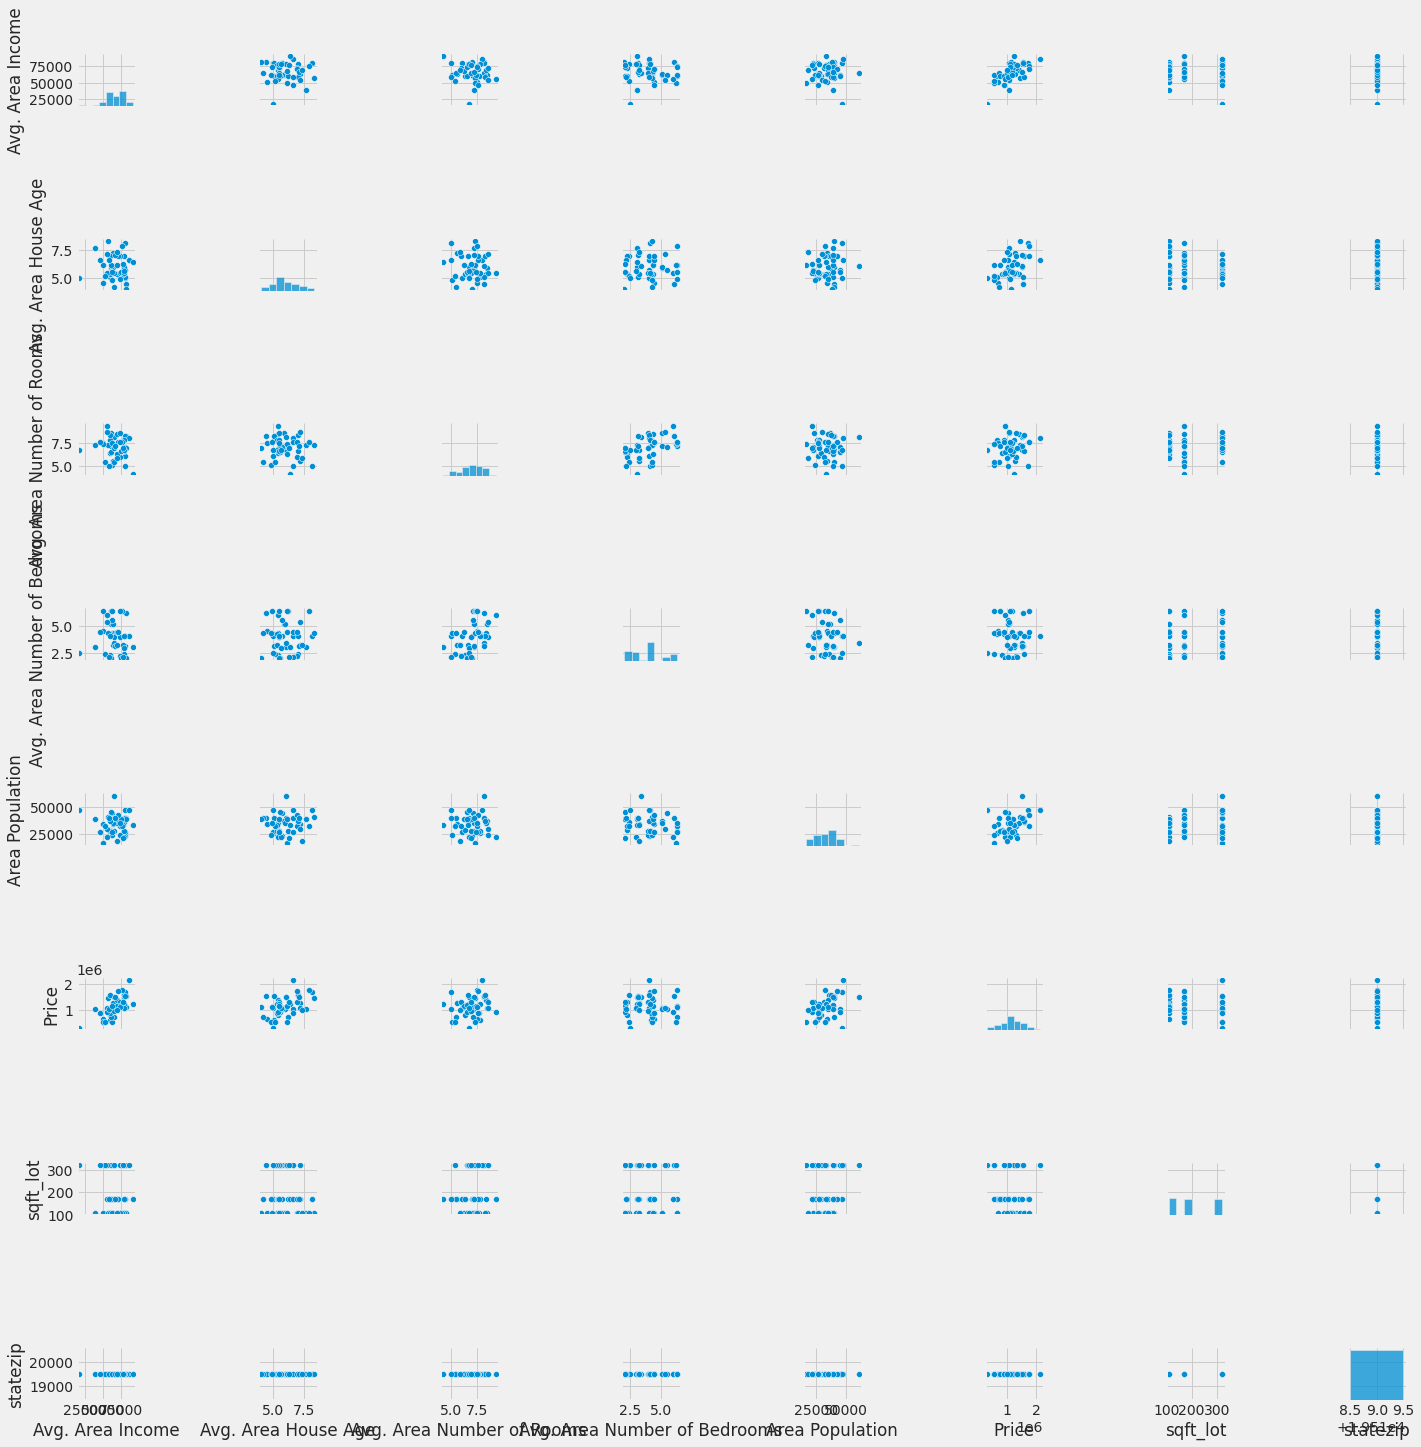

In [42]:
sns.pairplot(MadinatyHouse)

In [44]:
X = MadinatyHouse[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = MadinatyHouse['Price']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [49]:
# print the intercept
print(lin_reg.intercept_)

1184260.8491323527


In [50]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,286634.786291
Avg. Area House Age,157813.380180
Avg. Area Number of Rooms,160896.029673
Avg. Area Number of Bedrooms,-35995.272503
Area Population,140626.346988


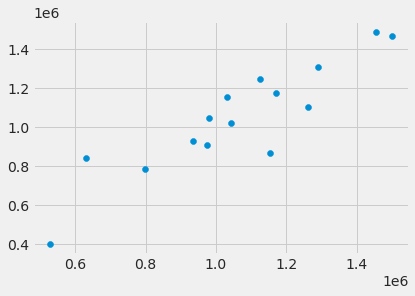

In [51]:
pred = lin_reg.predict(X_test)
plt.scatter(y_test, pred)

In [52]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 86338.23818763648
MSE: 14052788961.932337
RMSE: 118544.45985339145
R2 Square 0.7958792809906021
__________________________________
Train set evaluation:
_____________________________________
MAE: 87027.21717180684
MSE: 11338798413.740812
RMSE: 106483.79413667045
R2 Square 0.928632927025133
__________________________________


In [53]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,86338.238188,1.405279e+10,118544.459853,0.795879,0.824778


In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 168400.11241464384
MSE: 46816691557.59522
RMSE: 216371.65146477768
R2 Square 0.3199743646428812
__________________________________
Train set evaluation:
_____________________________________
MAE: 54887.493495563096
MSE: 4173174550.1947327
RMSE: 64600.11261750813
R2 Square 0.9737337906722385
__________________________________


In [55]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,86338.238188,1.405279e+10,118544.459853,0.795879,0.824778
1,Polynomail Regression,168400.112415,4.681669e+10,216371.651465,0.319974,0.000000
